In [1]:
# Step 1: Set Up Your Google Colab Environment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Step 2: Import Required Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [6]:
# Step 3: Set Up Paths and Parameters
base_dir = '/content/drive/MyDrive/catsanddogs'  # Update this path
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

img_height, img_width = 224, 224
batch_size = 32

In [7]:
# Step 4: Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Load validation data
valid_generator = valid_test_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Load test data
test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [9]:
# Step 5: Build Custom CNN Model
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [10]:
# Build MobileNetV3 Model
def build_mobilenetv3_model():
    base_model = MobileNetV3Large(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
    base_model.trainable = False  # Freeze the base model

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


In [11]:
# Step 6: Compile and Train CNN Model
cnn_model = build_cnn_model()
cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history_cnn = cnn_model.fit(train_generator, validation_data=valid_generator, epochs=10)  # Adjust epochs as necessary


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 276s 7s/step - accuracy: 0.5037 - loss: 1.4433 - val_accuracy: 0.5400 - val_loss: 0.6931
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 188s 4s/step - accuracy: 0.5307 - loss: 0.6938 - val_accuracy: 0.5350 - val_loss: 0.6926
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.5129 - loss: 0.6938 - val_accuracy: 0.5100 - val_loss: 0.6927
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 148s 5s/step - accuracy: 0.5209 - loss: 0.6927 - val_accuracy: 0.5100 - val_loss: 0.6901
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.5412 - loss: 0.6899 - val_accuracy: 0.5800 - val_loss: 0.6834
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.5538 - loss: 0.6858 - val_accuracy: 0.5800 - val_loss: 0.6800
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.5468 - loss: 0.6858 - val_accuracy: 0.5800 - val_loss: 0.6831
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 153s 5s/step - accuracy: 0.5298 - loss: 0.6892 - val_accuracy: 0.5750 - val_loss: 0.

In [12]:
# Step 7: Compile and Train MobileNetV3 Model
mobilenetv3_model = build_mobilenetv3_model()
mobilenetv3_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history_mobilenetv3 = mobilenetv3_model.fit(train_generator, validation_data=valid_generator, epochs=10)  # Adjust epochs as necessary


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.5412 - loss: 0.6919 - val_accuracy: 0.6150 - val_loss: 0.6880
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5213 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6914
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.4961 - loss: 0.6936 - val_accuracy: 0.6200 - val_loss: 0.6859
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.5875 - loss: 0.6878 - val_accuracy: 0.6050 - val_loss: 0.6849
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5546 - loss: 0.6877 - val_accuracy: 0.5100 - val_loss: 0.6859
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.5016 - loss: 0.6943 - val_accuracy: 0.5550 - val_loss: 0.6839
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.5399 - loss: 0.6895 - val_accuracy: 0.5400 - val_loss: 0.6842
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.528

In [13]:
# Step 8: Plot Training Accuracy and Loss
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

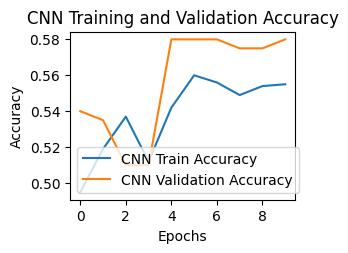

In [14]:
# CNN Training Plot
plt.subplot(2, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='CNN Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

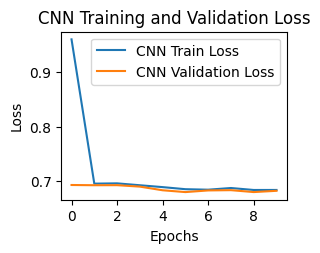

In [15]:
plt.subplot(2, 2, 2)
plt.plot(history_cnn.history['loss'], label='CNN Train Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

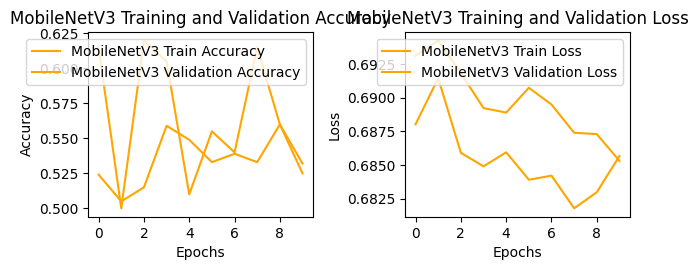

In [16]:
# MobileNetV3 Training Plot
plt.subplot(2, 2, 3)
plt.plot(history_mobilenetv3.history['accuracy'], label='MobileNetV3 Train Accuracy', color='orange')
plt.plot(history_mobilenetv3.history['val_accuracy'], label='MobileNetV3 Validation Accuracy', color='orange')
plt.title('MobileNetV3 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history_mobilenetv3.history['loss'], label='MobileNetV3 Train Loss', color='orange')
plt.plot(history_mobilenetv3.history['val_loss'], label='MobileNetV3 Validation Loss', color='orange')
plt.title('MobileNetV3 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
# Step 9: Evaluate Both Models
def evaluate_model(model, test_generator):
    predictions = model.predict(test_generator)
    predicted_classes = np.where(predictions > 0.5, 1, 0).flatten()
    true_classes = test_generator.classes
    report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
    cm = confusion_matrix(true_classes, predicted_classes)
    return report, cm

# Evaluate CNN Model
report_cnn, cm_cnn = evaluate_model(cnn_model, test_generator)
print("CNN Classification Report:\n", report_cnn)


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
CNN Classification Report:
               precision    recall  f1-score   support

         cat       0.65      0.40      0.49        50
         dog       0.57      0.78      0.66        50

    accuracy                           0.59       100
   macro avg       0.61      0.59      0.57       100
weighted avg       0.61      0.59      0.57       100



In [18]:
# Evaluate MobileNetV3 Model
report_mobilenetv3, cm_mobilenetv3 = evaluate_model(mobilenetv3_model, test_generator)
print("MobileNetV3 Classification Report:\n", report_mobilenetv3)


4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step
MobileNetV3 Classification Report:
               precision    recall  f1-score   support

         cat       0.53      1.00      0.69        50
         dog       1.00      0.12      0.21        50

    accuracy                           0.56       100
   macro avg       0.77      0.56      0.45       100
weighted avg       0.77      0.56      0.45       100



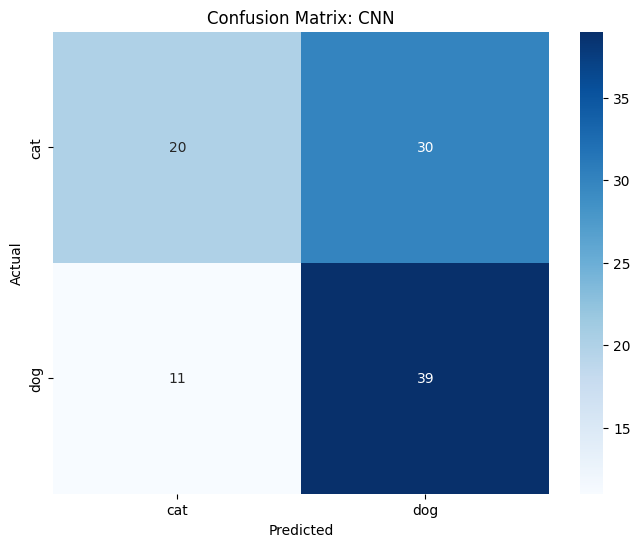

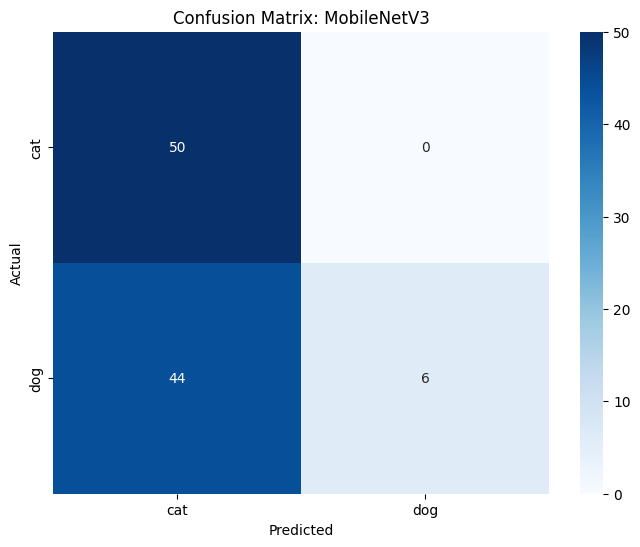

In [20]:
# Step 10: Confusion Matrix Visualization
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()
# Plot confusion matrices
plot_confusion_matrix(cm_cnn, "CNN")
plot_confusion_matrix(cm_mobilenetv3, "MobileNetV3")

In [21]:
# Step 9: Evaluate Both Models
def evaluate_model(model, test_generator):
    predictions = model.predict(test_generator)
    predicted_classes = np.where(predictions > 0.5, 1, 0).flatten()
    true_classes = test_generator.classes
    report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
    cm = confusion_matrix(true_classes, predicted_classes)
    return report, cm

# Evaluate CNN Model
report_cnn, cm_cnn = evaluate_model(cnn_model, test_generator)
print("CNN Classification Report:\n", report_cnn)

# Evaluate MobileNetV3 Model
report_mobilenetv3, cm_mobilenetv3 = evaluate_model(mobilenetv3_model, test_generator)
print("MobileNetV3 Classification Report:\n", report_mobilenetv3)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
CNN Classification Report:
               precision    recall  f1-score   support

         cat       0.65      0.40      0.49        50
         dog       0.57      0.78      0.66        50

    accuracy                           0.59       100
   macro avg       0.61      0.59      0.57       100
weighted avg       0.61      0.59      0.57       100

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step
MobileNetV3 Classification Report:
               precision    recall  f1-score   support

         cat       0.53      1.00      0.69        50
         dog       1.00      0.12      0.21        50

    accuracy                           0.56       100
   macro avg       0.77      0.56      0.45       100
weighted avg       0.77      0.56      0.45       100



In [22]:
# Step 9: Evaluate Both Models (without visualization)
def evaluate_model(model, test_generator):
    predictions = model.predict(test_generator)
    predicted_classes = np.where(predictions > 0.5, 1, 0).flatten()
    true_classes = test_generator.classes
    report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
    cm = confusion_matrix(true_classes, predicted_classes)
    return report, cm

# Evaluate CNN Model
report_cnn, cm_cnn = evaluate_model(cnn_model, test_generator)
print("CNN Classification Report:\n", report_cnn)
print("CNN Confusion Matrix:\n", cm_cnn)

# Evaluate MobileNetV3 Model
report_mobilenetv3, cm_mobilenetv3 = evaluate_model(mobilenetv3_model, test_generator)
print("MobileNetV3 Classification Report:\n", report_mobilenetv3)
print("MobileNetV3 Confusion Matrix:\n", cm_mobilenetv3)


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 946ms/step
CNN Classification Report:
               precision    recall  f1-score   support

         cat       0.65      0.40      0.49        50
         dog       0.57      0.78      0.66        50

    accuracy                           0.59       100
   macro avg       0.61      0.59      0.57       100
weighted avg       0.61      0.59      0.57       100

CNN Confusion Matrix:
 [[20 30]
 [11 39]]
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 625ms/step
MobileNetV3 Classification Report:
               precision    recall  f1-score   support

         cat       0.53      1.00      0.69        50
         dog       1.00      0.12      0.21        50

    accuracy                           0.56       100
   macro avg       0.77      0.56      0.45       100
weighted avg       0.77      0.56      0.45       100

MobileNetV3 Confusion Matrix:
 [[50  0]
 [44  6]]
